### ĐẶNG QUANG HƯNG 
### ID: ITDSIU18035

###Part 1

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive')
!pwd

/content/gdrive/My Drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
licensees = pd.read_csv('federal-firearm-licensees.csv', index_col=0)[1:]
licensees

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
1,1,66,003,01,7L,00150,"SALAZAR-MORET, CHARLES",AGUADA SPORT SHOP & ARMORY,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
2,1,66,003,01,8F,00258,"HERNANDEZ-MUNOZ, GILBERTO",ARMERIA Y ACCESORIOS EL NARANJAL,CARR 411 KM 1.0 BO GUAYABO SECTOR BAJURA,AGUADA,PR,00602,4 REPTO MINERVA,AGUADA,PR,00602,7878680125
3,1,66,003,08,8H,00285,"SALAZAR MORET, CHARLES",AGUADA SPORT SHOP,BO ASOMANTE CARR 115 KM 24-5,AGUADA,PR,00602,CALLE COLON #4 SUITE 3,AGUADA,PR,00602,7878686682
4,1,66,005,01,9M,00224,"CARDONA-VALENTIN, VIRGINIA",SHOOTING ACCESSORIES & SERVICE,BO PALMAR CARR 111 KM 1.8,AGUADILLA,PR,00603,HC 2 BOX 20554,AGUADILLA,PR,00603,7876587174
5,1,66,013,01,8M,83577,"GUTIERREZ-MARTINEZ, ORLANDO",G G AND GUNS,BETANCES 165,ARECIBO,PR,00612,BETANCES 165,ARECIBO,PR,00612,7878788329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80186,9,92,280,1,9H,4379,"ANGERMAN'S, INC",NaN,2 FRONT ST,WRANGELL,AK,9.9929e+08,PO BOX 928,WRANGELL,AK,999290000,9.07874e+09
80187,9,92,280,1,9B,771,OTTESEN'S INC,OTTESEN'S TRUE VALUE,104 FRONT ST,WRANGELL,AK,9.9929e+08,PO BOX 81,WRANGELL,AK,999290000,9.07874e+09
80188,9,92,280,1,0G,33533,"PRUNELLA, STEVE",NaN,2 MILE ZIMOVIA HWY,WRANGELL,AK,9.9929e+08,PO BOX 2157,WRANGELL,AK,999290000,9.07874e+09
80189,9,92,280,1,9H,35237,"MCCLOSKEY, ARLEN DOUGLAS",MCCLOSKEYS CUSTOM METAL WORK,110 SECOND AVE,WRANGELL,AK,9.9929e+08,PO BOX 493,WRANGELL,AK,999290000,9.07874e+09


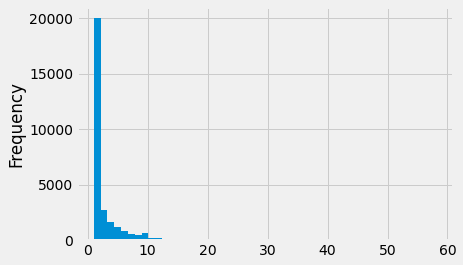

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
licensees['Premise Zip Code'].value_counts().plot.hist(bins=50)

In [ ]:
licensees['Premise Zip Code'].value_counts().mean()

2.7566777819794424

In [ ]:
X = licensees['Premise Zip Code'].value_counts()

In [ ]:
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [ ]:
t, p

(0.3602713469802255, 0.7186442244499638)

####Conclusion:

The  t  score tells us that our result is 0.36 standard deviations away from the average mean estimator result we can expect. 0.36 standard deviations is not a lot at all though! Our  p  value tells us that almost 72% of possible mean estimate values are further away from our expectation than the value that we got.

Since  0.72 > 0.05 , we fail to reject the null hypothesis  H0 . We conclude that there is strong evidence that mean = 2.75, that is, that the mean number of gun shops per US Zip Code is almost 3

###Part 2

In [ ]:
 temperature = pd.read_csv('GlobalTemperatures.csv')
 temperature

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


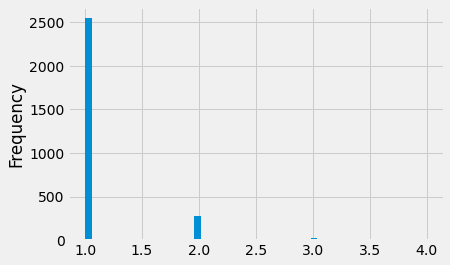

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
temperature['LandAverageTemperature'].value_counts().plot.hist(bins=50)

In [ ]:
X = temperature['LandAverageTemperature'].sample(frac = 0.25) 
X

3164    13.154
1510     4.614
2064     2.150
8       11.413
486     13.812
         ...  
2772     3.785
1443     7.879
1153     3.376
1163     3.776
1707     7.562
Name: LandAverageTemperature, Length: 798, dtype: float64

In [ ]:
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 8.37)
p = p_value(t)

In [ ]:
t, p

(1.2516859022618096, 0.21068433907874373)

Since 0.8 > 0.05 , we fail to reject the null hypothesis H0 . We conclude that there is strong evidence that mean = 8.37

###Part 3

In [ ]:
 data = pd.read_csv('GlobalLandTemperaturesByCity.csv')
 data['City'].unique()

array(['Århus', 'Çorlu', 'Çorum', ..., 'Zurich', 'Zuwarah', 'Zwolle'],
      dtype=object)

In [ ]:
bdata = data.copy()
bdata

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [ ]:
bdata['Latitude'] = bdata.Latitude.str.replace('S','')

In [ ]:

elist = []
for elem in bdata['Latitude']:
    elem = '-'+elem
    elist.append(elem)

In [ ]:
from pandas import DataFrame
df1 = DataFrame (elist,columns=['lat'])
df1

,lat
0,-57.05N
1,-57.05N
2,-57.05N
3,-57.05N
4,-57.05N
...,...
8599207,-52.24N
8599208,-52.24N
8599209,-52.24N
8599210,-52.24N


In [ ]:
df1['lat'] = df1['lat'].apply(lambda x : x.replace('-','') if 'N' in x else x)

In [ ]:
df1['lat'] = df1.lat.str.replace('N','')

In [ ]:
df1['lat'] = df1['lat'].astype(float)

In [ ]:
bdata['lat'] = df1
bdata

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,lat
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,57.05
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,57.05
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,57.05
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,57.05
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,57.05
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E,52.24
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E,52.24
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E,52.24
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E,52.24


In [ ]:
bdata = bdata.dropna(axis=0)

In [ ]:
bdata['dt'] = pd.to_datetime(bdata['dt'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df = bdata.loc[bdata['dt'].dt.year > 1900]

In [ ]:
column_feature = ['AverageTemperature', 'lat']
df = df[column_feature]
df

,AverageTemperature,lat
1886,-1.507,57.05
1887,-2.406,57.05
1888,1.224,57.05
1889,6.261,57.05
1890,12.181,57.05
...,...,...
8599206,7.710,52.24
8599207,11.464,52.24
8599208,15.043,52.24
8599209,18.775,52.24


In [ ]:
df = df.groupby('lat').mean().reset_index()

In [ ]:
df

,lat,AverageTemperature
0,-52.24,6.069933
1,-45.81,9.348432
2,-44.20,10.249246
3,-42.59,12.684076
4,-40.99,10.160350
...,...,...
68,61.88,-0.277336
69,63.49,1.891250
70,65.09,1.341979
71,68.31,-1.284374


In [ ]:
cut_points = [-50,-10,0,10,20,30,40,1000]
label_names = ["-50 to -10","-10 to 0","0 to 10","10 to 20","20 to 30","30 to 40", "40+"]
df["range"] = pd.cut(df["AverageTemperature"], cut_points,labels=label_names)

In [ ]:
arctic_circle = df.loc[df['lat'] >= 66.34]
arctic_circle['Region'] = 'arctic_circle'
arctic_circle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,AverageTemperature,range,Region
71,68.31,-1.284374,-10 to 0,arctic_circle
72,69.92,-11.498756,-50 to -10,arctic_circle


In [ ]:
tropic_of_cancer = df.loc[(df['lat'] < 66.34) & (df['lat'] >= 23.26)]
tropic_of_cancer['Region'] = 'tropic_of_cancer'
tropic_of_cancer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,AverageTemperature,range,Region
44,23.31,24.426178,20 to 30,tropic_of_cancer
45,24.92,22.943466,20 to 30,tropic_of_cancer
46,26.52,22.910445,20 to 30,tropic_of_cancer
47,28.13,21.852665,20 to 30,tropic_of_cancer
48,29.74,20.150434,20 to 30,tropic_of_cancer
49,31.35,19.319166,10 to 20,tropic_of_cancer
50,32.95,17.522356,10 to 20,tropic_of_cancer
51,34.56,15.370450,10 to 20,tropic_of_cancer
52,36.17,13.729962,10 to 20,tropic_of_cancer
53,37.78,13.474134,10 to 20,tropic_of_cancer


In [ ]:
equator = df.loc[(df['lat'] < 23.26) & (df['lat'] >= -23.26)]
equator['Region'] = 'equator'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
tropic_of_capricorn = df.loc[(df['lat'] < -23.26) & (df['lat'] >= -66.34)]
tropic_of_capricorn['Region'] = 'tropic_of_capricorn'
tropic_of_capricorn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,AverageTemperature,range,Region
0,-52.24,6.069933,0 to 10,tropic_of_capricorn
1,-45.81,9.348432,0 to 10,tropic_of_capricorn
2,-44.20,10.249246,10 to 20,tropic_of_capricorn
3,-42.59,12.684076,10 to 20,tropic_of_capricorn
4,-40.99,10.160350,10 to 20,tropic_of_capricorn
5,-39.38,12.558474,10 to 20,tropic_of_capricorn
6,-37.78,13.894406,10 to 20,tropic_of_capricorn
7,-36.17,13.359273,10 to 20,tropic_of_capricorn
8,-34.56,15.414423,10 to 20,tropic_of_capricorn
9,-32.95,15.303263,10 to 20,tropic_of_capricorn


In [ ]:
frames = [arctic_circle, tropic_of_cancer, equator, tropic_of_capricorn]
df = pd.concat(frames)
df

,lat,AverageTemperature,range,Region
71,68.31,-1.284374,-10 to 0,arctic_circle
72,69.92,-11.498756,-50 to -10,arctic_circle
44,23.31,24.426178,20 to 30,tropic_of_cancer
45,24.92,22.943466,20 to 30,tropic_of_cancer
46,26.52,22.910445,20 to 30,tropic_of_cancer
...,...,...,...,...
11,-29.74,17.549109,10 to 20,tropic_of_capricorn
12,-28.13,18.527713,10 to 20,tropic_of_capricorn
13,-26.52,17.297609,10 to 20,tropic_of_capricorn
14,-24.92,19.594268,10 to 20,tropic_of_capricorn


In [ ]:
df

,lat,AverageTemperature,range,Region
71,68.31,-1.284374,-10 to 0,arctic_circle
72,69.92,-11.498756,-50 to -10,arctic_circle
44,23.31,24.426178,20 to 30,tropic_of_cancer
45,24.92,22.943466,20 to 30,tropic_of_cancer
46,26.52,22.910445,20 to 30,tropic_of_cancer
...,...,...,...,...
11,-29.74,17.549109,10 to 20,tropic_of_capricorn
12,-28.13,18.527713,10 to 20,tropic_of_capricorn
13,-26.52,17.297609,10 to 20,tropic_of_capricorn
14,-24.92,19.594268,10 to 20,tropic_of_capricorn


In [ ]:
new = pd.crosstab(df.Region, df.range, margins = True)
new

range,-50 to -10,-10 to 0,0 to 10,10 to 20,20 to 30,All
Region,,,,,,
arctic_circle,1,1,0,0,0,2
equator,0,0,0,1,27,28
tropic_of_cancer,0,1,14,7,5,27
tropic_of_capricorn,0,0,2,13,1,16
All,1,2,16,21,33,73


In [ ]:
observed = new.iloc[0:4,0:5]   # Get table without totals for later use
observed

range,-50 to -10,-10 to 0,0 to 10,10 to 20,20 to 30
Region,,,,,
arctic_circle,1,1,0,0,0
equator,0,0,0,1,27
tropic_of_cancer,0,1,14,7,5
tropic_of_capricorn,0,0,2,13,1


In [ ]:

expected =  np.outer(new['All'][0:4],
                     new.loc['All'][0:5]) / 73

expected = pd.DataFrame(expected)
expected.columns = ["-50 to -10","-10 to 0","0 to 10","10 to 20","20 to 30"]
expected.index = ["arctic circle","equator", "tropic of cancer","tropic of capricorn"]
expected

,-50 to -10,-10 to 0,0 to 10,10 to 20,20 to 30
arctic circle,0.027397,0.054795,0.438356,0.575342,0.904110
equator,0.383562,0.767123,6.136986,8.054795,12.657534
tropic of cancer,0.369863,0.739726,5.917808,7.767123,12.205479
tropic of capricorn,0.219178,0.438356,3.506849,4.602740,7.232877


In [ ]:
chi_squared_stat = (((new.iloc[0:4,0:5]-expected)**2)/expected).sum().sum()
chi_squared_stat

29.71830550401979

In [ ]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 12)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=12)
print("P value")
print(p_value)

Critical value
21.02606981748307
P value
0.0030782690898212284
